In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
data = pd.read_csv('G:\DSA\Activity\Case Study 8\Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
data.shape

(178, 13)

In [12]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<AxesSubplot:>

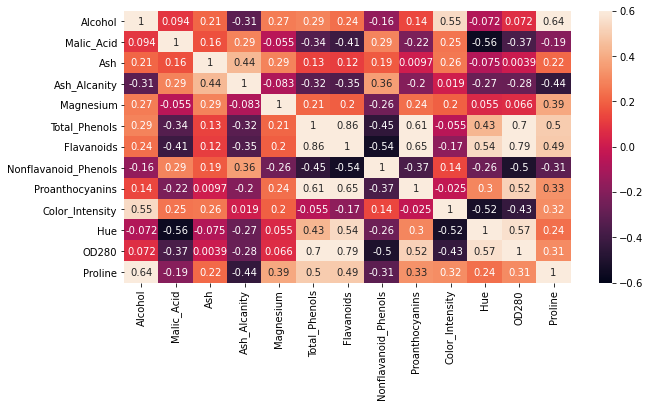

In [129]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, vmin = -0.6, vmax =0.6)

'Hue','Nonflavanoid_Phenols','Alcohol','Flavanoids','Proanthocyanins','Total_Phenols' shows high correlation with one or more other features. So we shall drop these features

In [134]:
data1 = data.drop(['Hue','Nonflavanoid_Phenols','Alcohol','Flavanoids','Proanthocyanins','Total_Phenols'],axis = 1)
X = data1.values
X

array([[   1.71,    2.43,   15.6 , ...,    5.64,    3.92, 1065.  ],
       [   1.78,    2.14,   11.2 , ...,    4.38,    3.4 , 1050.  ],
       [   2.36,    2.67,   18.6 , ...,    5.68,    3.17, 1185.  ],
       ...,
       [   4.28,    2.26,   20.  , ...,   10.2 ,    1.56,  835.  ],
       [   2.59,    2.37,   20.  , ...,    9.3 ,    1.62,  840.  ],
       [   4.1 ,    2.74,   24.5 , ...,    9.2 ,    1.6 ,  560.  ]])

<AxesSubplot:>

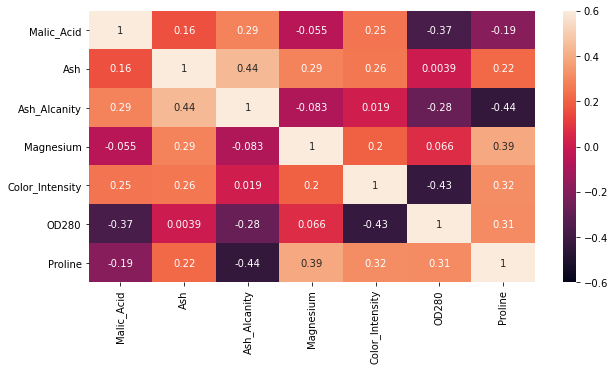

In [135]:
plt.figure(figsize = (10,5))
sns.heatmap(data1.corr(), annot = True, vmin = -0.6, vmax =0.6)

In [113]:
# create some sample data points to make predictions using the clustering model
s1 = np.array([5.8, 2.13, 21.5, 86.0, 2.6, 3.1, 380.0]).reshape(1,-1)
s2 = np.array([1.35, 2.27, 16.0, 98.0, 7.22, 3.55, 1045.0]).reshape(1,-1)
s3 = np.array([1.29, 2.1, 20.0, 103.0, 7.6, 1.55, 640.0]).reshape(1,-1)

# K-Means Clustering

In [146]:
from sklearn.cluster import KMeans
wcss = [] # a list to store the inertia value on each iteration using different number of clusters
for n in range(1,10):
    cluster = KMeans(n_clusters = n, init = 'k-means++',random_state = 18)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
wcss

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[17591863.831121203, 4543442.617818674, 2370395.9053851194, 1331743.9494746404, 916100.6460711748, 660788.920473592, 413459.5010769783, 322946.6367773598, 270738.57739600545]


Plotting number of clusters against the inertia for each selection of cluster number to determine the optimum number of clusters for the given data

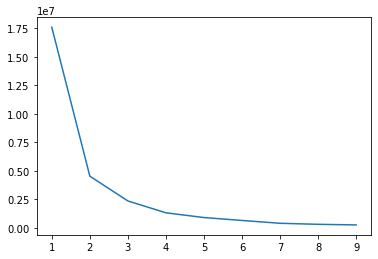

In [122]:
plt.plot(range(1,10),wcss)

From elbow plot, we can observe that the optimum number of centroids is 3. So cluster the data points into 3 clusters using kmeans clustering

In [137]:
model = KMeans(n_clusters = 3, init = 'k-means++',random_state = 18)
model.fit(X)
labels = model.labels_
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

Maximum number of features can be visualized is 3.Lets see how the features Malic Acid, Ash, and Magnesium are distributed using a 3D Scatter plot.

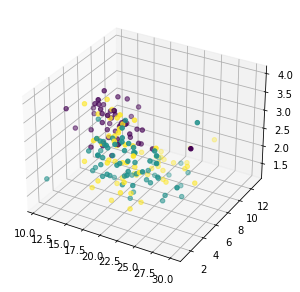

In [145]:
plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,2],X[:,4],X[:,5],c = labels)

Lets predict the clusters for the available sample data

In [147]:
#Sample 1
model.predict(s1)[0]

0

In [125]:
#Sample 2
model.predict(s2)[0]

1

In [148]:
#Sample 3
model.predict(s3)[0]

2

# Hierarchical Clustering

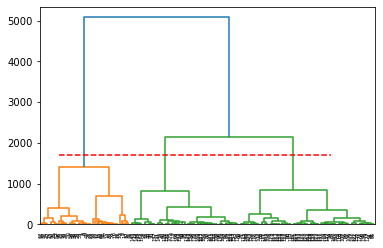

In [127]:
# Plotting a dendrogram to determine the optimum number of clusters for hierarchical clustering
import  scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method = 'ward'),show_leaf_counts = False)
plt.hlines(1700,100,1550,colors='r', linestyle='dashed')
plt.show()

From the dendrogram it is found that the optimum number of clusters is 3. So we shall perform hierarchical clustering using 3 number of clusters

In [128]:
from sklearn.cluster import AgglomerativeClustering
hie_model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'ward')
hie_model.fit(X)
hie_model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)